In [2]:
import pandas as pd # Use the work with the data 2frames
import numpy as np  # Mainly use to assing nan values as np.nan
import matplotlib.pyplot as plt # Visualitzation
from matplotlib.ticker import MaxNLocator # Visualitzation
import statistics  # Uses to compute statistics
import os
import scipy.interpolate
from collections import Counter
import matplotlib.dates as mdates
from main import *

In [3]:
rp_9300_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Rockport/Rockport_1993-2002_pwl_harmwl_bwl.csv')
rp_9300_LH.drop(labels=range(876480,876486),axis = 0, inplace = True)
rp_0112_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Rockport/Rockport_2003-2012_pwl_harmwl_bwl.csv')
rp_0112_LH.drop(labels=range(876720,876726), axis = 0, inplace=True)
rp_1323_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Rockport/Rockport_2013-2023_pwl_harmwl_bwl.csv')
rp_1323_LH.drop(labels=range(len(rp_1323_LH)-6,len(rp_1323_LH)), axis=0, inplace=True)
directory_path = '/Users/rprocious/Downloads/data/NOAA/rockport/'
dataframes = []

# Loop through the files in the directory
for filename in sorted(os.listdir(directory_path)):
    if filename.endswith('level.csv'):

        file_path = os.path.join(directory_path, filename)
        
        
        df = pd.read_csv(file_path)
        
        dataframes.append(df)

rp_NOAA = pd.concat(dataframes, ignore_index=True)
rp_NOAA.drop(labels=range(0,3), axis = 0,inplace=True)
rp_NOAA.reset_index(drop = True, inplace=True)
frames = [rp_9300_LH,rp_0112_LH,rp_1323_LH]
rp_LH = pd.concat(frames, ignore_index=True)
rp_LH.drop(labels=range(0,262800),axis=0, inplace=True)
rp_LH.reset_index(drop=True, inplace=True)

comparison_df = pd.DataFrame()
comparison_df['Dates'] = rp_LH['#date+time']
comparison_df['Lighthouse WL'] = rp_LH['015-pwl']
comparison_df['NOAA WL'] = rp_NOAA[' Water Level']

comparison_df['Dates'] = pd.to_datetime(comparison_df['Dates'])
comparison_df['Lighthouse WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df['NOAA WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df['Lighthouse WL'] = pd.to_numeric(comparison_df['Lighthouse WL'],errors= 'coerce')
comparison_df['NOAA WL'] = pd.to_numeric(comparison_df['NOAA WL'],errors='coerce')
comparison_df.tail()


C:\Users\rprocious\AppData\Local\Temp\ipykernel_34548\3236771090.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  rp_9300_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Rockport/Rockport_1993-2002_pwl_harmwl_bwl.csv')
C:\Users\rprocious\AppData\Local\Temp\ipykernel_34548\3236771090.py:5: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  rp_1323_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Rockport/Rockport_2013-2023_pwl_harmwl_bwl.csv')
C:\Users\rprocious\AppData\Local\Temp\ipykernel_34548\3236771090.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

,Dates,Lighthouse WL,NOAA WL
2454475,2023-12-31 23:30:00,NaN,NaN
2454476,2023-12-31 23:36:00,NaN,NaN
2454477,2023-12-31 23:42:00,NaN,NaN
2454478,2023-12-31 23:48:00,NaN,NaN
2454479,2023-12-31 23:54:00,NaN,NaN


In [4]:
#function to find the index of a date range
'''def date_index_locater(start_date,end_date):
    indices = []
# Filter rows by date range
    date_range_filter = (comparison_df['Dates'] >= start_date) & (comparison_df['Dates'] <= end_date)

# Get the indices of the rows within the date range
    indices = (comparison_df[date_range_filter].index.tolist())

    return(indices)
'''
date_index_locater('2004-04-02 00:00', '2004-04-02 12:00', comparison_df)

[723360,
 723361,
 723362,
 723363,
 723364,
 723365,
 723366,
 723367,
 723368,
 723369,
 723370,
 723371,
 723372,
 723373,
 723374,
 723375,
 723376,
 723377,
 723378,
 723379,
 723380,
 723381,
 723382,
 723383,
 723384,
 723385,
 723386,
 723387,
 723388,
 723389,
 723390,
 723391,
 723392,
 723393,
 723394,
 723395,
 723396,
 723397,
 723398,
 723399,
 723400,
 723401,
 723402,
 723403,
 723404,
 723405,
 723406,
 723407,
 723408,
 723409,
 723410,
 723411,
 723412,
 723413,
 723414,
 723415,
 723416,
 723417,
 723418,
 723419,
 723420,
 723421,
 723422,
 723423,
 723424,
 723425,
 723426,
 723427,
 723428,
 723429,
 723430,
 723431,
 723432,
 723433,
 723434,
 723435,
 723436,
 723437,
 723438,
 723439,
 723440,
 723441,
 723442,
 723443,
 723444,
 723445,
 723446,
 723447,
 723448,
 723449,
 723450,
 723451,
 723452,
 723453,
 723454,
 723455,
 723456,
 723457,
 723458,
 723459,
 723460,
 723461,
 723462,
 723463,
 723464,
 723465,
 723466,
 723467,
 723468,
 723469,
 723470,
 

Text(0.5, 1.0, 'NOAA interpolation into a time shift')

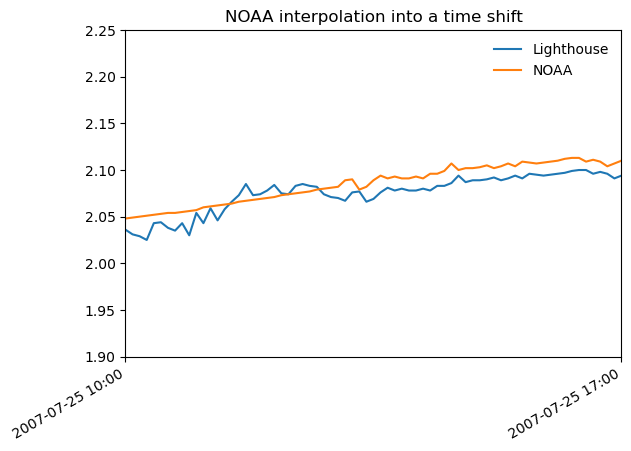

In [5]:
plt.plot(comparison_df['Dates'],comparison_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(1.9,2.25)

start_date = pd.to_datetime('2007-07-25 10:00')

end_date = pd.to_datetime('2007-07-25 17:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('NOAA interpolation into a time shift')

In [6]:
date_index_locater('2007-07-25 15:00','2007-07-25 17:00',comparison_df)

[1013670,
 1013671,
 1013672,
 1013673,
 1013674,
 1013675,
 1013676,
 1013677,
 1013678,
 1013679,
 1013680,
 1013681,
 1013682,
 1013683,
 1013684,
 1013685,
 1013686,
 1013687,
 1013688,
 1013689,
 1013690]

In [7]:
comparison_df[1013470:1013690]

,Dates,Lighthouse WL,NOAA WL
1013470,2007-07-24 19:00:00,NaN,2.065
1013471,2007-07-24 19:06:00,NaN,2.064
1013472,2007-07-24 19:12:00,NaN,2.062
1013473,2007-07-24 19:18:00,NaN,2.061
1013474,2007-07-24 19:24:00,NaN,2.060
...,...,...,...
1013685,2007-07-25 16:30:00,2.100,2.109
1013686,2007-07-25 16:36:00,2.096,2.111
1013687,2007-07-25 16:42:00,2.098,2.109
1013688,2007-07-25 16:48:00,2.096,2.104


In [8]:
#drops a nan value before time shift
revised_LH = pd.DataFrame()
revised_LH['Adjusted LH WL'] = comparison_df['Lighthouse WL']
revised_LH.drop(1013471,axis = 0, inplace=True)
revised_LH.reset_index(drop = True, inplace=True)
comparison_df['Shifted LH WL'] = revised_LH['Adjusted LH WL']
comparison_df[1013690:1013700]

,Dates,Lighthouse WL,NOAA WL,Shifted LH WL
1013690,2007-07-25 17:00:00,2.094,2.110,2.097
1013691,2007-07-25 17:06:00,2.097,2.127,2.114
1013692,2007-07-25 17:12:00,2.114,2.133,2.120
1013693,2007-07-25 17:18:00,2.120,2.136,2.123
1013694,2007-07-25 17:24:00,2.123,2.129,2.116
1013695,2007-07-25 17:30:00,2.116,2.131,2.118
1013696,2007-07-25 17:36:00,2.118,2.116,2.103
1013697,2007-07-25 17:42:00,2.103,2.116,2.103
1013698,2007-07-25 17:48:00,2.103,2.131,2.118
1013699,2007-07-25 17:54:00,2.118,2.139,2.126


Text(0.5, 1.0, 'NOAA interpolation into a time shift')

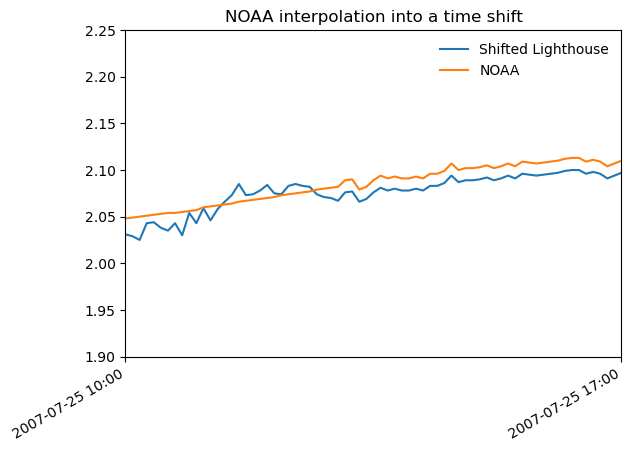

In [9]:
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Shifted Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(1.9,2.25)

start_date = pd.to_datetime('2007-07-25 10:00')

end_date = pd.to_datetime('2007-07-25 17:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('NOAA interpolation into a time shift')

In [10]:
'''differences = comparison_df['Shifted LH WL'] - comparison_df['NOAA WL']
non_zero_differences = differences != 0

filtered_differences = differences[non_zero_differences]
filtered_dates = comparison_df['Dates'][non_zero_differences]

# Convert the results to DataFrames
differences_df = filtered_differences.to_frame(name='Difference')
dates_df = filtered_dates.to_frame(name='Date')

# Combine the two DataFrames
remaining_differences = differences_df.join(dates_df, how='inner')

cleaned_remaining_differences = remaining_differences.dropna()
cleaned_remaining_differences.reset_index(drop = True, inplace=True)
mask = abs(cleaned_remaining_differences['Difference']) >= 0.005

cleaned_remaining_differences = cleaned_remaining_differences[mask]


for i in range(1, 11):
    cleaned_remaining_differences[f'Next_{i}'] = cleaned_remaining_differences['Difference'].shift(-i)

# Check if the current value is equal to the next 10 values
cleaned_remaining_differences['All_Next_10_Equal'] = cleaned_remaining_differences.apply(lambda row: all(row['Difference'] == row[f'Next_{i}'] for i in range(1, 11)), axis=1)

# Drop the helper columns if they are no longer needed
cleaned_remaining_differences.drop(columns=[f'Next_{i}' for i in range(1, 11)], inplace=True)


mask = cleaned_remaining_differences['All_Next_10_Equal'] == True

# Filter the DataFrame using the mask
cleaned_remaining_differences = cleaned_remaining_differences[mask]

# Reset index if needed
cleaned_remaining_differences.reset_index(drop=True, inplace=True)

cleaned_remaining_differences.to_clipboard()'''

ten_offset_points(comparison_df)


In [11]:
mask = comparison_df['NOAA WL'] == comparison_df['NOAA WL'].shift(-1)

# Use the mask to filter the DataFrame and get the double values and date
double_values = comparison_df.loc[mask, 'NOAA WL']
double_dates = comparison_df.loc[mask, 'Dates']

double_dates

22        1996-01-01 02:12:00
38        1996-01-01 03:48:00
42        1996-01-01 04:12:00
45        1996-01-01 04:30:00
54        1996-01-01 05:24:00
                  ...        
2387089   2023-03-26 04:54:00
2387114   2023-03-26 07:24:00
2387128   2023-03-26 08:48:00
2387151   2023-03-26 11:06:00
2387159   2023-03-26 11:54:00
Name: Dates, Length: 282043, dtype: datetime64[ns]

0.008,-0.013,0.006

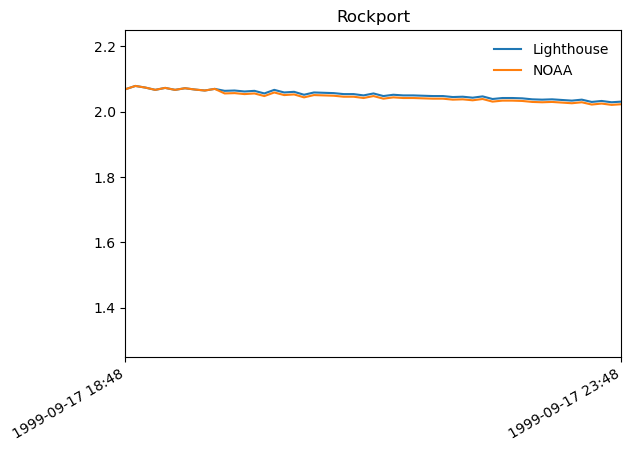

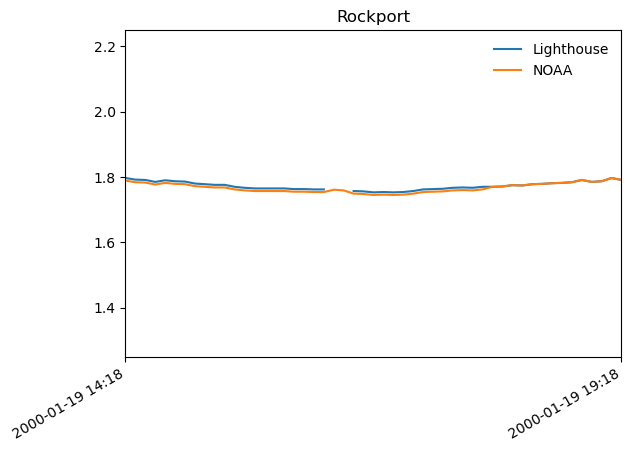

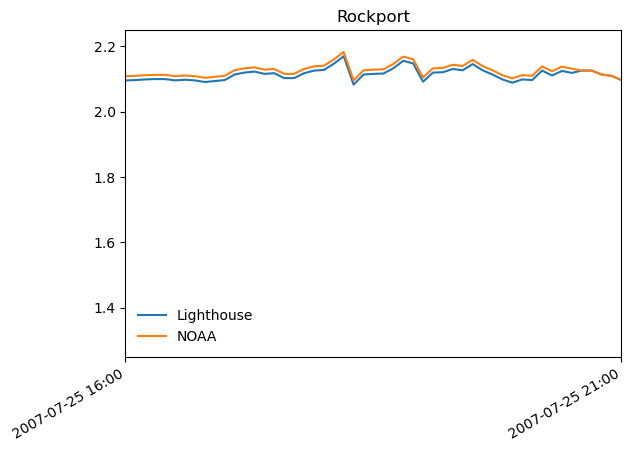

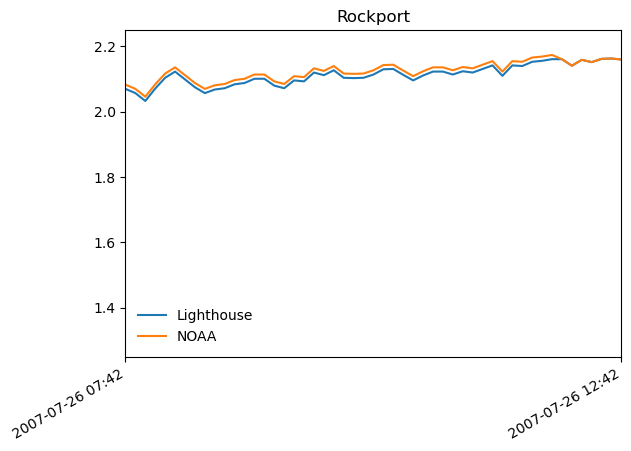

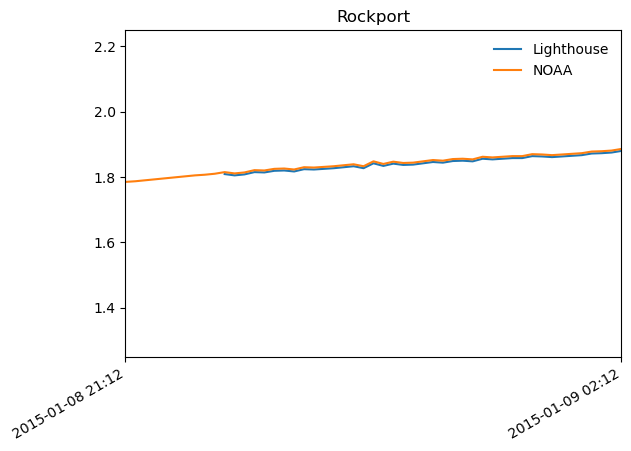

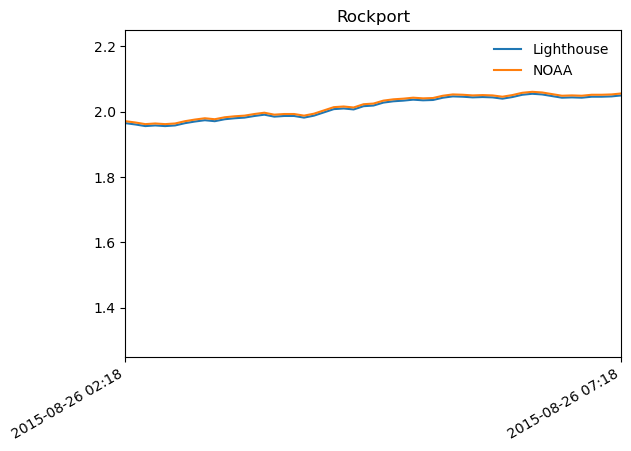

In [12]:
start_dates = ('1999-09-17 19:48','2000-01-19 15:18','2007-07-25 17:00','2007-07-26 08:42','2015-01-08 22:12','2015-08-26 03:18')

'''for i in range(len(start_dates)):
    plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

    plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

    plt.gcf().autofmt_xdate()

    plt.ylim(1.25,2.25)

    start_date = pd.to_datetime(start_dates[i]) - pd.DateOffset(hours= 1)

    end_date = pd.to_datetime(start_dates[i]) + pd.DateOffset(hours = 4)

    plt.xlim(start_date, end_date)
    plt.legend(frameon = False)
    plt.title('Rockport')
    plt.show()'''

plotting_offsets(start_dates,comparison_df,'Rockport')

Locator attempting to generate 1094 ticks ([9008.0, ..., 19938.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1094 ticks ([9008.0, ..., 19938.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1094 ticks ([9008.0, ..., 19938.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '0.008m Offset')

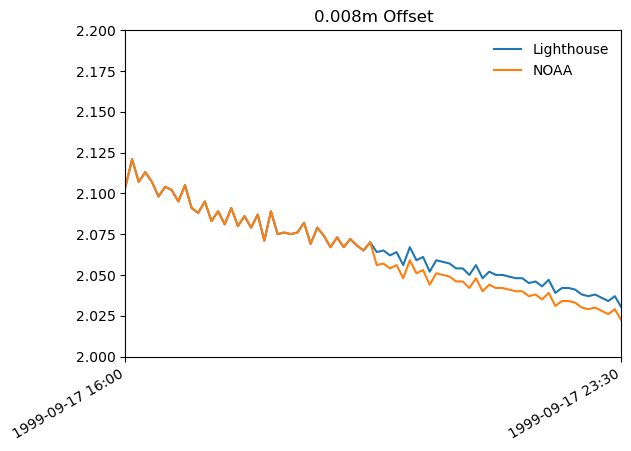

In [13]:
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(2,2.2)

start_date = pd.to_datetime('1999-09-17 16:00')

end_date = pd.to_datetime('1999-09-17 23:30')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('0.008m Offset')

Locator attempting to generate 1094 ticks ([9008.0, ..., 19938.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1094 ticks ([9008.0, ..., 19938.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1094 ticks ([9008.0, ..., 19938.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '-0.013m Offset')

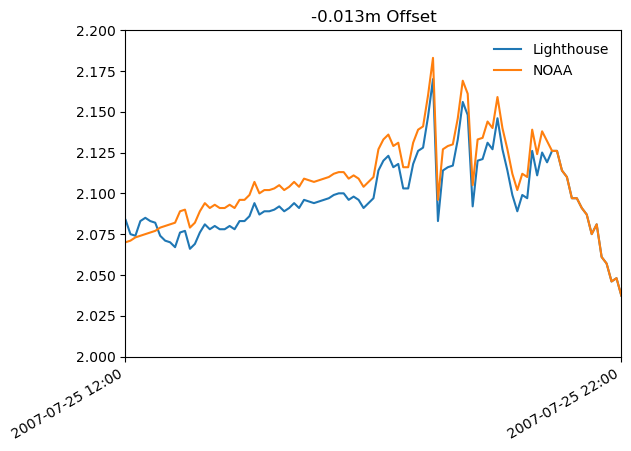

In [14]:
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(2,2.2)

start_date = pd.to_datetime('2007-07-25 12:00')

end_date = pd.to_datetime('2007-07-25 22:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('-0.013m Offset')

In [15]:

end_dates = ['1999-09-17 19:42','2007-07-25 16:54','2015-01-08 22:06']

nan_counts = {}

for end_date in end_dates:
    end_index = comparison_df[comparison_df['Dates'] == end_date].index[0]
    start_index = comparison_df.loc[:end_index, 'Shifted LH WL'].last_valid_index()
    
    # Count the NaNs in the gap
    nan_count = comparison_df.loc[start_index:end_index, 'Shifted LH WL'].isna().sum()
    
    # Store the count in the dictionary
    nan_counts[end_date] = nan_count
nan_counts

{'1999-09-17 19:42': 0, '2007-07-25 16:54': 0, '2015-01-08 22:06': 9}

In [21]:
comparison_df['Differences'] = comparison_df['Shifted LH WL'] - comparison_df['NOAA WL']

In [22]:
date_locations = date_index_locater('1999-09-17 17:42','1999-09-17 21:42',comparison_df)
comparison_df[date_locations[0]:date_locations[-1]]

,Dates,Lighthouse WL,NOAA WL,Shifted LH WL,Differences
325377,1999-09-17 17:42:00,2.080,2.080,2.080,0.000
325378,1999-09-17 17:48:00,2.086,2.086,2.086,0.000
325379,1999-09-17 17:54:00,2.079,2.079,2.079,0.000
325380,1999-09-17 18:00:00,2.087,2.087,2.087,0.000
325381,1999-09-17 18:06:00,2.071,2.071,2.071,0.000
325382,1999-09-17 18:12:00,2.089,2.089,2.089,0.000
325383,1999-09-17 18:18:00,2.075,2.075,2.075,0.000
325384,1999-09-17 18:24:00,2.076,2.076,2.076,0.000
325385,1999-09-17 18:30:00,2.075,2.075,2.075,0.000
325386,1999-09-17 18:36:00,2.076,2.076,2.076,0.000


In [27]:
date_locations = date_index_locater('2007-07-25 11:54','2007-07-25 14:54',comparison_df)
comparison_df[date_locations[0]:date_locations[-1]]

,Dates,Lighthouse WL,NOAA WL,Shifted LH WL,Differences
1013639,2007-07-25 11:54:00,2.074,2.069,2.078,0.009
1013640,2007-07-25 12:00:00,2.078,2.070,2.084,0.014
1013641,2007-07-25 12:06:00,2.084,2.071,2.075,0.004
1013642,2007-07-25 12:12:00,2.075,2.073,2.074,0.001
1013643,2007-07-25 12:18:00,2.074,2.074,2.083,0.009
1013644,2007-07-25 12:24:00,2.083,2.075,2.085,0.010
1013645,2007-07-25 12:30:00,2.085,2.076,2.083,0.007
1013646,2007-07-25 12:36:00,2.083,2.077,2.082,0.005
1013647,2007-07-25 12:42:00,2.082,2.079,2.074,-0.005
1013648,2007-07-25 12:48:00,2.074,2.080,2.071,-0.009


In [24]:
date_locations = date_index_locater('2015-01-08 20:06','2015-01-08 23:06',comparison_df)
comparison_df[date_locations[0]:date_locations[-1]]

,Dates,Lighthouse WL,NOAA WL,Shifted LH WL,Differences
1667481,2015-01-08 20:06:00,1.760,1.755,1.755,0.000
1667482,2015-01-08 20:12:00,1.755,1.760,1.760,0.000
1667483,2015-01-08 20:18:00,1.760,1.762,NaN,NaN
1667484,2015-01-08 20:24:00,NaN,1.763,NaN,NaN
1667485,2015-01-08 20:30:00,NaN,1.765,NaN,NaN
1667486,2015-01-08 20:36:00,NaN,1.766,NaN,NaN
1667487,2015-01-08 20:42:00,NaN,1.768,NaN,NaN
1667488,2015-01-08 20:48:00,NaN,1.771,NaN,NaN
1667489,2015-01-08 20:54:00,NaN,1.773,NaN,NaN
1667490,2015-01-08 21:00:00,NaN,1.776,NaN,NaN
